# Dataset Information
This dataset is obtained through Kaggle Playground Series - Season 4 Episode 1

https://www.kaggle.com/competitions/playground-series-s4e1

# Problem Statement
Your Goal: For this Episode of the Series, your task is to predict whether a customer continues with their account or closes it (e.g., churns). Good luck!

# Background Information
"Bank account churning is the strategy of opening new bank accounts to profit from their sign-up bonuses and promotional offers." - [Jack Duffley](https://jackduffley.com/a-guide-to-bank-account-churning-for-passive-income/#:~:text=Bank%20account%20churning%20is%20the,of%20lowering%20your%20credit%20score.)


In [1]:
# importing libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Data Pre-processing

In [6]:
import pandas as pd 

train = pd.read_csv("data/train.csv")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


CustomerID and Surname has little or no impact on whether a person will bank churn or not, as it is just a string to indentified an individuals. 

In [9]:
train = train.drop("CustomerId",axis = 1)
train = train.drop("Surname", axis = 1)
train.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [10]:
train.describe()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Data Insight

Relative to this dataset

1. The average credit score is quite hight 
2. The age is quite young
3. Tenure average to about 5 years
4. Most of them has certain amount of balance
5. Most of them has a credit card


"loan tenure is the amount of time you are given to repay your loan" - [Capital.com.sg](https://capitall.com.sg/about-loan-tenure/#:~:text=Simply%20put%2C%20loan%20tenure%20is,dependent%20on%20your%20outstanding%20balance.)

## Data Correlation

We will be using heatmap method to check the correlation with the **Exited** attributes

We will be using this method on numerical data, excluding the data below:
1. Geography
2. Gender

In [14]:
numerical_features = ["CreditScore","Age","Tenure","Balance","NumOfProducts","IsActiveMember","EstimatedSalary","Exited"]

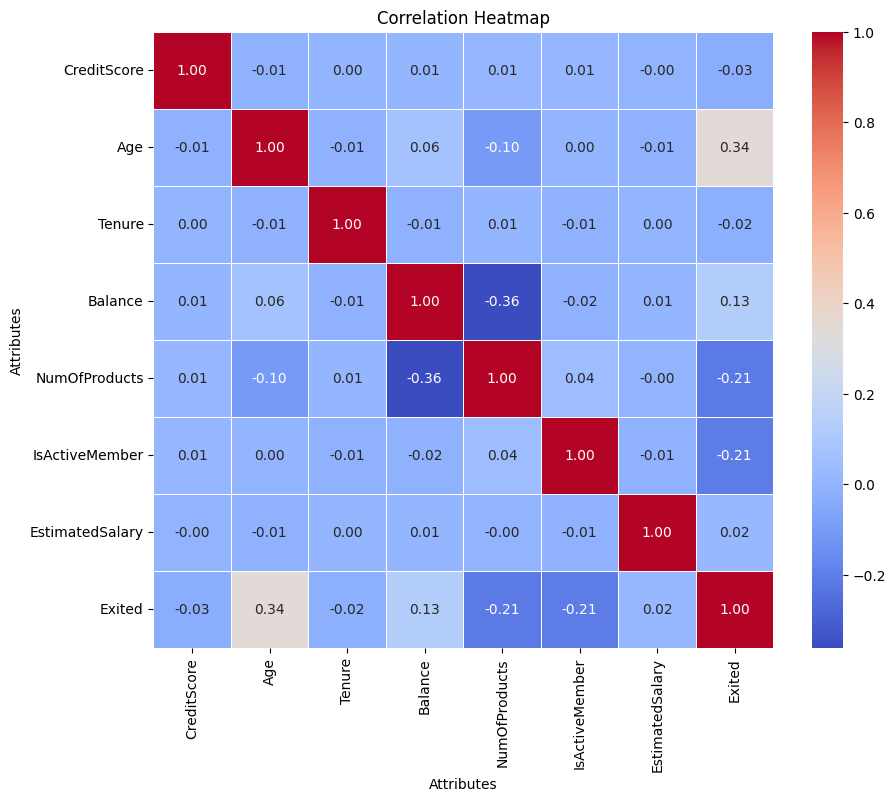

In [17]:
train_numerical = train.loc[:,numerical_features]
corr_matrix = train_numerical.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Add titles and labels as needed
plt.title('Correlation Heatmap')
plt.xlabel('Attributes')
plt.ylabel('Attributes')
plt.show()

Looking at the Final Column (or the final Row), we can see that attributes with:

**Positive Correlation**
1. Age
2. Balance

**Negative Correlation**
1. NumOfProducts
2. IsActiveMember

**Little Correlation**
1. CreditScore - TO MY SURPRISE!

<Axes: xlabel='Geography', ylabel='count'>

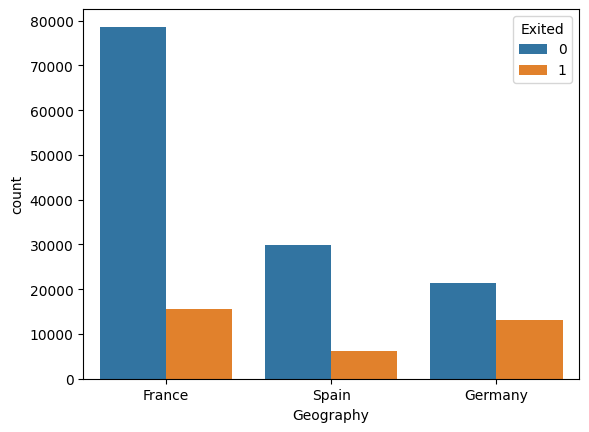

In [18]:
# Geography

sns.countplot(data=train, x="Geography", hue="Exited")

In [21]:
France = train[train.Geography == "France"]
France_Exited = France[France.Exited == 1]
print("France Exited ratio: ",len(France_Exited)/len(France))

France Exited ratio:  0.16528153691025846


In [22]:
Spain = train[train.Geography == "Spain"]
Spain_Exited = Spain[Spain.Exited == 1]
print("Spain Exited ratio: ",len(Spain_Exited)/len(Spain))

Spain Exited ratio:  0.1721757379946428


In [23]:
Germany = train[train.Geography == "Germany"]
Germany_Exited = Germany[Germany.Exited == 1]
print("Germany Exited ratio: ",len(Germany_Exited)/len(Germany))

Germany Exited ratio:  0.3789516268855112


As we can see from the analysis, German has the highest Exit ratio, relative to France and Spain, this might be an effect of the culture. 

<Axes: xlabel='Gender', ylabel='count'>

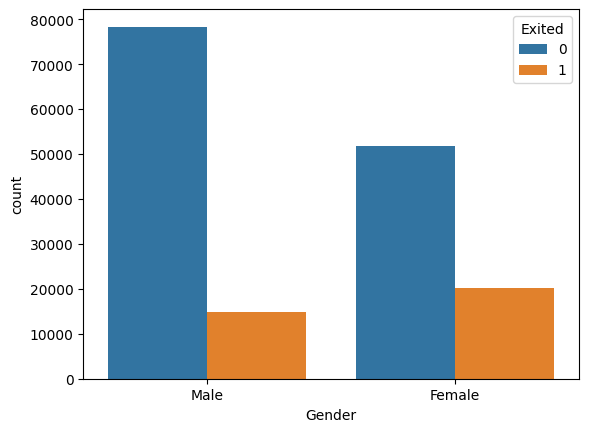

In [24]:
# Gender

sns.countplot(data=train, x="Gender", hue="Exited")

In [25]:
Male = train[train.Gender == "Male"]
Male_Exited = Male[Male.Exited == 1]
print("Male Exited ratio: ",len(Male_Exited)/len(Male))

Male Exited ratio:  0.1590552871712292


In [26]:
Female = train[train.Gender == "Female"]
Female_Exited = Female[Female.Exited == 1]
print("Female Exited ratio: ",len(Female_Exited)/len(Female))

Female Exited ratio:  0.2796867174892883
